In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import seaborn as sns
from datetime import datetime
import geopandas as gpd #pip install geopandas
sns.set()

pytrend = TrendReq()

pytrend.build_payload(kw_list=kw_list,timeframe = 'today 3-m')#import data from GOOGLE trend API


# Google Trend Analysis

In this notebook, we will analyze google trend data on Coronavirus and related topics.

## Interest by country

Each country's search of key word = 'coronavirus' on google is summarized here. Each country's value is normalized (with the maximum being 100 and the minimum being 0).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

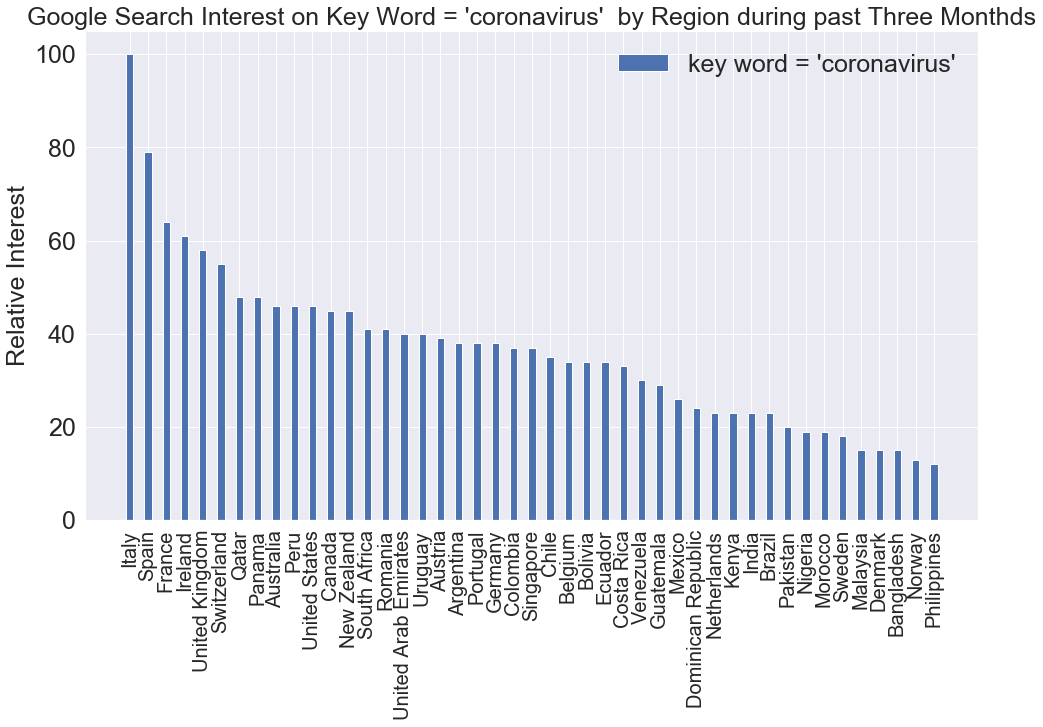

In [181]:
kw_list=['coronavirus']

# Interest by Region

region_df = pytrend.interest_by_region()
region_df = region_df[region_df.coronavirus > 10]
region_df = region_df.reset_index()
region_df = region_df.sort_values('coronavirus',ascending=False)#sort the countries by relative interest
labels = region_df['geoName']

fig,ax = plt.subplots(1,1,figsize=(16,9))
x = np.arange(len(labels))#the label locations
width = 0.4
ax.bar(x,height=region_df.coronavirus,width=width,label = 'key word = \'coronavirus\'')
#ax.bar(x+0.5*width,height=region_df.COVID19,width=width,label='COVID19') #can add another key word into the plot
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=20)
ax.set_ylabel("Relative Interest",fontsize=25)
ax.set_yticklabels(labels = [0,20,40,60,80,100] ,fontsize=25)
ax.legend(frameon=False,fontsize=25)
ax.set_title("Google Search Interest on Key Word = 'coronavirus'  by Region during past Three Monthds",fontsize=25)
plt.xticks(rotation=90)

## Interest over time in US and Italy in past Three Months



In [163]:
#interest over time in US and Italy


def gen_region_time_df(region='',kw_list=['coronavirus'],timeframe='today 3-m',gprop = ''):
    pytrend.build_payload(kw_list=kw_list, timeframe='today 3-m', geo = region)
    # Input
    # kw_list: keyword list, default is ['coronavirus']
    # region: two-letter country code, e.g. 'US' for united states and 'IT' for Italy, default is world
    # timeframe = same keyword as 'timeframe' in 'build_payload'. default is 'today 3-m', which means past three months from today
    # gprop: what google property to filter to, e.g. 'images'; default is all.
    #
    #
    #
    #
    # Output
    # interest_over_time_df: dataframe of coronavirus search per 'day' in 'region'
    interest_over_time_df = pytrend.interest_over_time()
    interest_over_time_df = interest_over_time_df.reset_index()
    return interest_over_time_df




In [168]:
#create dataframe

us_day_df = gen_region_time_df('US')
italy_day_df = gen_region_time_df('IT')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

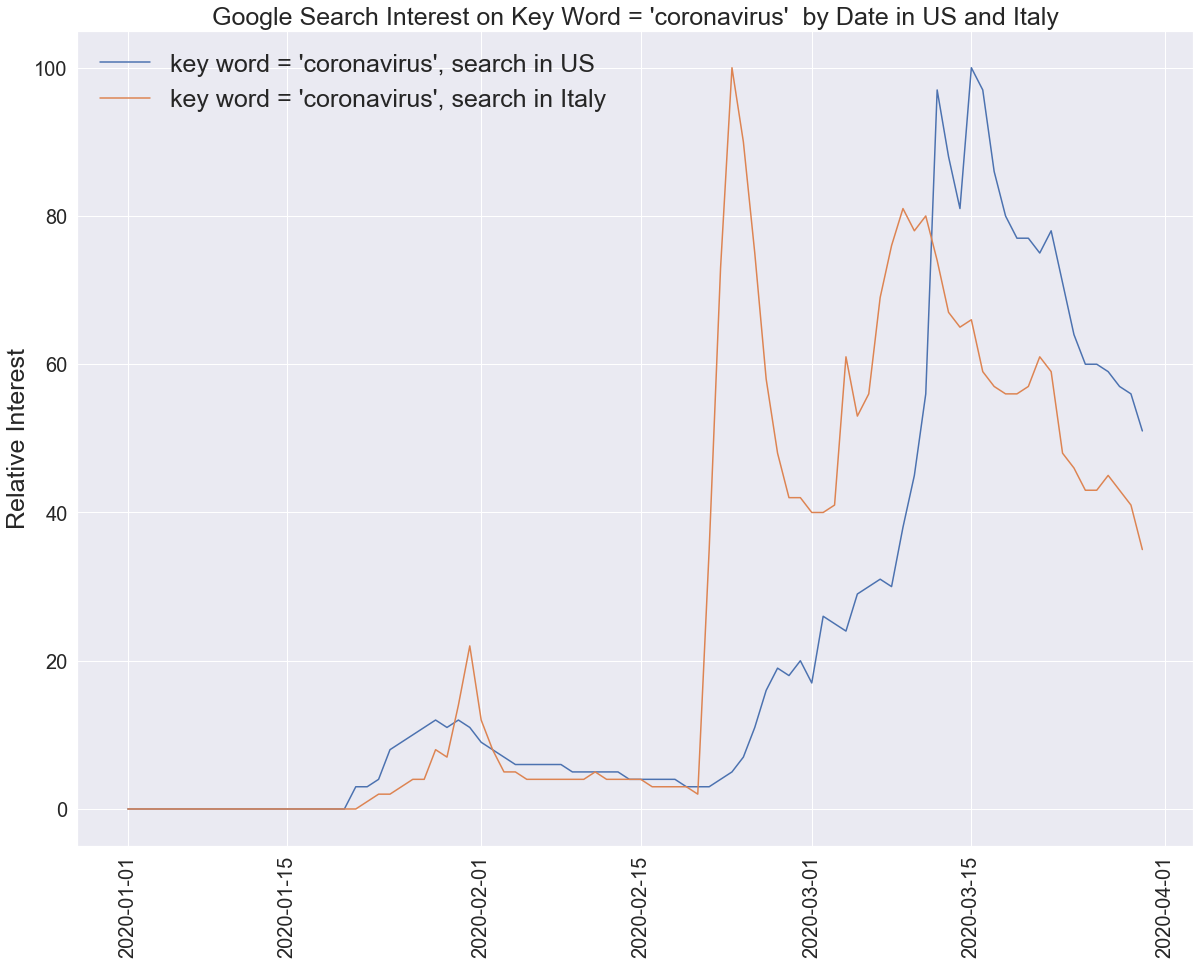

In [167]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax.plot(us_day_df.date,us_day_df.coronavirus,label = 'key word = \'coronavirus\', search in US')
ax.plot(italy_day_df.date,italy_day_df.coronavirus,label = 'key word = \'coronavirus\', search in Italy')

ax.set_ylabel("Relative Interest",fontsize=25)
#ax.set_yticklabels(labels = [0,20,40,60,80,100] ,fontsize=25)
ax.legend(frameon=False,fontsize=25)
#ax.set_ylim(0,200)
ax.set_title("Google Search Interest on Key Word = 'coronavirus'  by Date in US and Italy",fontsize=25)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)

## Related Topics and Queries

In [175]:

pytrend.build_payload(kw_list=kw_list, timeframe='today 3-m', geo = 'US')

#related topics

us_topic_df = pytrend.related_topics()
us_topic_df

{'coronavirus': {'rising':      value formattedValue                                               link  \
  0   875150       Breakout  /trends/explore?q=/m/09c7w0&date=today+3-m&geo=US   
  1   216700       Breakout   /trends/explore?q=/m/03rjj&date=today+3-m&geo=US   
  2   209950       Breakout  /trends/explore?q=/m/0d05w3&date=today+3-m&geo=US   
  3   165750       Breakout  /trends/explore?q=/g/11csq9vs7j&date=today+3-m...   
  4   162300       Breakout   /trends/explore?q=/m/01zrs&date=today+3-m&geo=US   
  5   138200       Breakout   /trends/explore?q=/m/0d0xs&date=today+3-m&geo=US   
  6   113450       Breakout   /trends/explore?q=/m/09kvv&date=today+3-m&geo=US   
  7      800          +800%  /trends/explore?q=/m/01b_06&date=today+3-m&geo=US   
  8      600          +600%   /trends/explore?q=/m/0294j&date=today+3-m&geo=US   
  9      450          +450%  /trends/explore?q=/m/01cpyy&date=today+3-m&geo=US   
  10     250          +250%   /trends/explore?q=/m/0cycc&date=today+3-m&g

In [174]:
#related queries

us_query_df = pytrend.related_queries()
us_query_df

{'coronavirus': {'top':                       query  value
  0        coronavirus update    100
  1                  symptoms     98
  2      coronavirus symptoms     96
  3         coronavirus cases     88
  4            us coronavirus     57
  5           coronavirus map     55
  6                    corona     55
  7           coronavirus usa     52
  8          coronavirus news     46
  9          coronavirus tips     36
  10             corona virus     32
  11  symptoms of coronavirus     28
  12        china coronavirus     28
  13                    china     27
  14      what is coronavirus     27
  15        italy coronavirus     26
  16                    italy     26
  17        coronavirus in us     26
  18          cdc coronavirus     24
  19      florida coronavirus     24
  20       coronavirus deaths     22
  21       coronavirus in usa     19
  22     coronavirus new york     19
  23          nyc coronavirus     18
  24   coronavirus california     18,
  'rising':    

## World Map

Here we create an interactive map for each country's interest in coronavirus. Geopanda, bokeh and json are used.

In [214]:
shapefile = './ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.iloc[4]=gdf.iloc[4].replace('United States of America','United States')
gdf.head()


,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [215]:
#region_df imported previously
region_df = pytrend.interest_by_region()
region_df = region_df.reset_index()
region_df['country']=region_df['geoName']
region_df.tail(4)

,geoName,coronavirus,country
246,Yemen,0,Yemen
247,Zambia,0,Zambia
248,Zimbabwe,0,Zimbabwe
249,Åland Islands,0,Åland Islands


In [216]:
#merge map and region df

merged_df = gdf.merge(region_df,on='country')
merged_df=merged_df.drop(['geoName'],axis=1)
merged_df.head()


,country,country_code,geometry,coronavirus
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0
1,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",45
3,United States,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",46
4,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0


In [217]:
import json
#Read data to json.
merged_json = json.loads(merged_df.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [218]:

#a static map
#more info on https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0


from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
#Define custom tick labels for color bar.
tick_labels = {'0': '0', '5': '5', '10':'10', '15':'15', '20':'20', '25':'25', '30':'30','35':'35', '40': '>40'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Coronavirus search on Google', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'coronavirus', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [224]:
#An interactive map
#more info on https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column
#Define function that returns json_data for year selected by user.
    

geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][6]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 100, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels = {'0': '0', '5': '5', '10':'10', '15':'15', '20':'20', '25':'25', '30':'30','35':'35', '40': '40','50': '50','60': '60','70': '70','80': '>80'}
#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country'),('% coronavirus', '@coronavirus')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Coronavirus search on Google', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'coronavirus', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'below')
# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = 'coronavirus'
    
# Make a slider object: slider 
#slider = Slider(title = 'Year',start = 1975, end = 2016, step = 1, value = 2016)
#slider.on_change('value', update_plot)
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p)
curdoc().add_root(layout)
#Display plot inline in Jupyter notebook
output_notebook()
#Display plot
show(layout)

Loading BokehJS ...